In [1]:
import sys, os
import pandas as pd
import joblib
import shap

root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.append(root_path)

from src.data_preprocessing import clean_data
from src.feature_engineering import add_features


/Users/phuonglinh39/Documents/Employee-Attrition-Prediction/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_path = "../models/attrition_model.pkl"
model = joblib.load(model_path)

model


RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=300,
                       random_state=42)

In [3]:
df = pd.read_csv("../data/HR_capstone_dataset.csv")

df_clean = clean_data(df)
df_fe = add_features(df_clean)

X = df_fe.drop("left", axis=1)
y = df_fe["left"]

print(X.shape, y.shape)
X.head()


(11991, 23) (11991,)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,hours_per_project,long_tenure,high_eval,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction_bucket_medium,satisfaction_bucket_high
0,0.38,0.53,2,157,3,0,0,78.500000,0,0,...,False,False,False,True,False,False,True,False,True,False
1,0.80,0.86,5,262,6,0,0,52.400000,1,1,...,False,False,False,True,False,False,False,True,False,True
2,0.11,0.88,7,272,4,0,0,38.857143,1,1,...,False,False,False,True,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,44.600000,1,1,...,False,False,False,True,False,False,True,False,False,True
4,0.37,0.52,2,159,3,0,0,79.500000,0,0,...,False,False,False,True,False,False,True,False,True,False


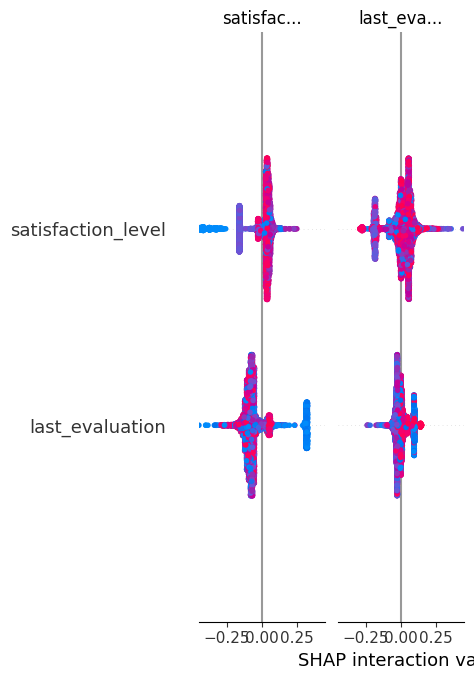

In [4]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)


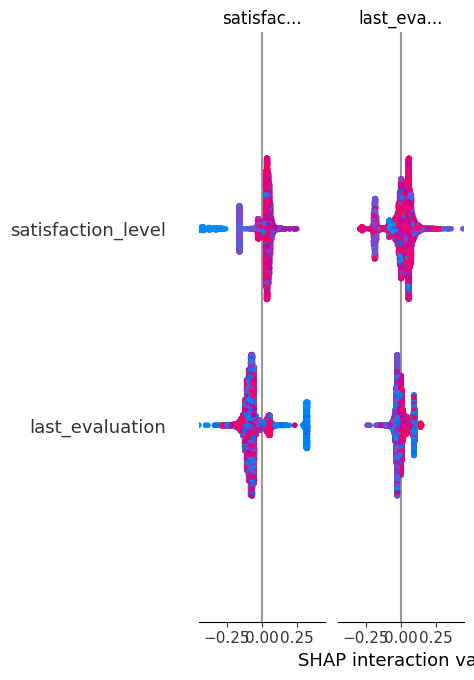

In [5]:
shap.summary_plot(shap_values, X, plot_type="bar")


In [6]:

X_sample = X.iloc[[0]]
X_sample


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,hours_per_project,long_tenure,high_eval,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,satisfaction_bucket_medium,satisfaction_bucket_high
0,0.38,0.53,2,157,3,0,0,78.5,0,0,...,False,False,False,True,False,False,True,False,True,False
